# Data Science Capstone Three: Project Oil Prices Forecast Data_Wrangling

## Project Description

> #### According to New York Times, "Gas prices in the United States are at record highs. And even when adjusting for inflation, they are on average at levels rarely seen in the last 50 years, including during the energy crisis of the late 1970s." The purpose of this project is to look at the historical data to test if current increase could have been predicted using time series forecasting models, like AR or ARIMA.




### Data Source

* Source: U.S. Energy Information Administration (Jan 2021)
* The data contains the following information:
> * A1: Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)
> * A2: Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)
> * A3: Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * R1: Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
> * R2: Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)
> * R3: Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * M1: Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)
> * M2: Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)
> * M3: Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * P1: Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)> *
> * P2: Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)
> * P3: Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)
> * D1: Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon) 

* Data Retrieved August 28, 2022 from (https://www.kaggle.com/datasets/mruanova/us-gasoline-and-diesel-retail-prices-19952021/download?datasetVersionNumber=1)

In [1]:
#Import python libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Load the Data 

df = pd.read_csv('/Users/Maryam/Desktop/DS_Projects_MA/Capstone_Three_Oil_Prices_Prediction/data/PET_PRI_GND_DCUS_NUS_W.csv')



In [3]:
#Get the shape of the transaction data
df.shape

(1361, 14)

In [4]:
# Get the information on the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1361 entries, 0 to 1360
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1361 non-null   object 
 1   A1      1361 non-null   float64
 2   A2      1361 non-null   float64
 3   A3      1361 non-null   float64
 4   R1      1361 non-null   float64
 5   R2      1361 non-null   float64
 6   R3      1361 non-null   float64
 7   M1      1361 non-null   float64
 8   M2      1361 non-null   float64
 9   M3      1361 non-null   float64
 10  P1      1361 non-null   float64
 11  P2      1361 non-null   float64
 12  P3      1361 non-null   float64
 13  D1      1361 non-null   float64
dtypes: float64(13), object(1)
memory usage: 149.0+ KB


In [5]:
# Describe the dataframe

df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1,1361.0,2.285680,0.859028,0.949,1.461,2.326,2.903,4.165
A2,1361.0,2.234511,0.843815,0.926,1.433,2.251,2.825,4.102
A3,1361.0,2.396873,0.883311,1.039,1.550,2.458,3.060,4.301
R1,1361.0,2.225170,0.850143,0.907,1.421,2.237,2.828,4.114
R2,1361.0,2.178511,0.835549,0.885,1.393,2.175,2.765,4.054
R3,1361.0,2.329126,0.876739,0.974,1.489,2.367,2.976,4.247
M1,1361.0,2.382822,0.882107,1.008,1.517,2.481,3.033,4.229
M2,1361.0,2.320970,0.858521,0.979,1.482,2.404,2.930,4.153
M3,1361.0,2.508877,0.908861,1.112,1.616,2.627,3.206,4.387
P1,1361.0,2.519840,0.911055,1.100,1.607,2.693,3.209,4.344


In [6]:
# View the form of the transaction data
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
0,01/02/1995,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104
1,01/09/1995,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102
2,01/16/1995,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100
3,01/23/1995,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095
4,01/30/1995,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090


In [7]:
#Set Up Columns "Date", "Year", "Month", "Day"

df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [8]:
df.head()

,Date,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,Year,Month,Day
0,1995-01-02,1.127,1.104,1.231,1.079,1.063,1.167,1.170,1.159,1.298,1.272,1.250,1.386,1.104,1995,1,2
1,1995-01-09,1.134,1.111,1.232,1.086,1.070,1.169,1.177,1.164,1.300,1.279,1.256,1.387,1.102,1995,1,9
2,1995-01-16,1.126,1.102,1.231,1.078,1.062,1.169,1.168,1.155,1.299,1.271,1.249,1.385,1.100,1995,1,16
3,1995-01-23,1.132,1.110,1.226,1.083,1.068,1.165,1.177,1.165,1.296,1.277,1.256,1.378,1.095,1995,1,23
4,1995-01-30,1.131,1.109,1.221,1.083,1.068,1.162,1.176,1.163,1.291,1.275,1.255,1.370,1.090,1995,1,30


In [9]:
# Check for misssing data

df.isnull().any()

Date     False
A1       False
A2       False
A3       False
R1       False
R2       False
R3       False
M1       False
M2       False
M3       False
P1       False
P2       False
P3       False
D1       False
Year     False
Month    False
Day      False
dtype: bool

In [10]:
# Check for datatypes

df.dtypes

Date     datetime64[ns]
A1              float64
A2              float64
A3              float64
R1              float64
R2              float64
R3              float64
M1              float64
M2              float64
M3              float64
P1              float64
P2              float64
P3              float64
D1              float64
Year              int64
Month             int64
Day               int64
dtype: object

In [11]:
df.describe()

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1,Year,Month,Day
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000
mean,2.285680,2.234511,2.396873,2.225170,2.178511,2.329126,2.382822,2.320970,2.508877,2.519840,2.472096,2.609244,2.404699,2007.537105,6.509184,15.720059
std,0.859028,0.843815,0.883311,0.850143,0.835549,0.876739,0.882107,0.858521,0.908861,0.911055,0.894472,0.925587,0.998646,7.528494,3.458805,8.802003
min,0.949000,0.926000,1.039000,0.907000,0.885000,0.974000,1.008000,0.979000,1.112000,1.100000,1.074000,1.191000,0.953000,1995.000000,1.000000,1.000000
25%,1.461000,1.433000,1.550000,1.421000,1.393000,1.489000,1.517000,1.482000,1.616000,1.607000,1.573000,1.695000,1.418000,2001.000000,4.000000,8.000000
50%,2.326000,2.251000,2.458000,2.237000,2.175000,2.367000,2.481000,2.404000,2.627000,2.693000,2.640000,2.769000,2.479000,2008.000000,7.000000,16.000000
75%,2.903000,2.825000,3.060000,2.828000,2.765000,2.976000,3.033000,2.930000,3.206000,3.209000,3.127000,3.318000,3.070000,2014.000000,10.000000,23.000000
max,4.165000,4.102000,4.301000,4.114000,4.054000,4.247000,4.229000,4.153000,4.387000,4.344000,4.283000,4.459000,4.764000,2021.000000,12.000000,31.000000


## Part I. Data Wrangling



In [12]:
#Yearly Average Data

YoY= df.groupby('Year').sum()

YoY.drop(columns=["Month", "Day"], inplace=True)

YoY

,A1,A2,A3,R1,R2,R3,M1,M2,M3,P1,P2,P3,D1
Year,,,,,,,,,,,,,
1995,60.201,59.464,63.420,57.765,57.372,60.450,62.433,62.192,66.815,67.495,66.932,71.180,57.676
1996,65.960,65.234,68.733,63.551,63.172,65.815,68.114,67.848,72.290,73.174,72.646,76.217,65.470
1997,64.701,63.845,67.954,62.350,61.812,65.121,66.778,66.389,71.618,71.763,71.161,75.243,62.312
1998,55.729,54.923,58.923,53.542,52.866,56.045,58.339,57.506,62.455,63.121,62.337,66.336,54.282
1999,61.155,60.087,65.528,59.062,58.031,62.148,64.147,62.765,69.218,68.621,67.421,72.784,58.267
2000,79.182,78.036,83.467,77.158,76.040,80.229,81.976,80.535,86.856,86.473,85.248,90.545,77.520
2001,77.396,75.367,82.089,75.263,73.343,79.416,80.204,77.793,85.607,84.931,82.754,89.656,74.227
2002,72.070,70.315,75.550,69.914,68.259,73.238,74.850,72.759,78.866,79.568,77.778,82.887,68.575
2003,83.357,80.838,88.433,81.177,78.822,86.045,86.228,83.232,92.017,90.886,88.263,95.781,78.485


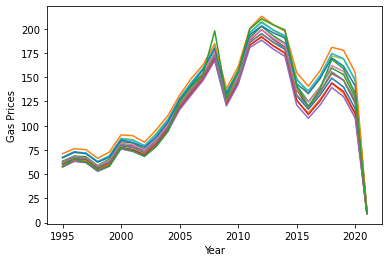

In [13]:
## plot graph

plt.xlabel('Year')
plt.ylabel('Gas Prices')
plt.plot(YoY)

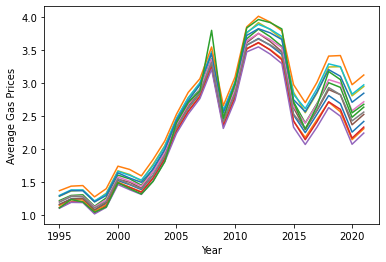

In [14]:
#Find and plot Average Yearly Prices

YoY_Ave = df.groupby('Year').mean()
YoY_Ave.drop(columns=['Month', 'Day'], inplace=True)

plt.xlabel('Year')
plt.ylabel('Average Gas Prices')
plt.plot(YoY_Ave)

In [15]:
#Highs/Lows in Years

Year_Max = YoY.max()

print('The peak price in the past 10 years was:', Year_Max.max())

Year_Low = YoY.min()

print('The lowest price in the past 10 years was:', Year_Low.min())

The peak price in the past 10 years was: 212.90900000000002
The lowest price in the past 10 years was: 8.975000000000001


In [16]:
# save the data to a new csv file

datapath = '../data/summary_data_cleaned.csv'

df.to_csv(datapath)